# eBay Review Classification
## Team 10
### Leonard Littleton, Kiran Singh, Andrew Zazueta

## Libraries

In [119]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

from string import punctuation
from nltk.corpus import stopwords
import re
import emoji

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Reading in Data from eBay

#### Custom Functions

In [87]:
# Generating links by imputting review page link

def link_generator(url):
    
    # truncating link to get base
    
    page = url
    page_base = page[:-1]

    # finding total review pages

    r = requests.get(page)
    soup = BeautifulSoup(r.text, 'html.parser')
    total_pages = int(str(soup).split('"totalPages":')[1].split('}')[0])
    links = []

    # generating links
    
    for link in range(1,total_pages+1):
        links.append(page_base+str(link))
    
    return links

def ebay_scrape(links):
    
    stars = []
    content = []
    titles = []
    
    for page in links:
    
        r = requests.get(page)
        soup = BeautifulSoup(r.text, 'html.parser')
    
        for star in soup.find_all('div', class_='ebay-review-section-l'): 
            stars.append(star.find('span','star-rating')['aria-label'])
        
        for review_content in soup.find_all('p', class_ = 'review-item-content rvw-wrap-spaces'): 
            content.append(review_content.text)
    
        for review_title in soup.find_all('h3', class_ = 'review-item-title rvw-nowrap-spaces'): 
            titles.append(review_title.text)
            
    return stars, content, titles

#### Product 1: Texas Instruments TI-83 Plus Graphing Calculator

In [93]:
# initialzing df

eBay_1 = []
eBay_1 = pd.DataFrame(eBay_1)

In [94]:
# Getting page and page base to generate links

url = 'https://www.ebay.com/urw/Texas-Instruments-TI-83-Plus-Graphing-Calculator/product-reviews/54847886?condition=all&pgn=1'
links = link_generator(url)

In [95]:
# using ebay_scrape to collect star rating, the content of the reviews, and the review title

stars, content, titles = ebay_scrape(links) 

In [96]:
# Putting list into Data Frame

eBay_1['Review Title'] = titles
#eBay['Review Content'] = content
eBay_1['Stars'] = stars
eBay_1['Item'] = 'Texas Instruments TI-83 Plus Graphing Calculator'

A user must include a title in their review, but content is not needed. This creates a different amount of content items than titles and stars. This results in us having to use titles as our source of text, as there is no way to know which reviews have content in their review or not. 

#### Product 2: Apple AirPods Pro Left Airpod OEM Left Side Airpods Pro Only

In [240]:
# initialzing df

eBay_2 = []
eBay_2 = pd.DataFrame(eBay_2)

In [74]:
# Getting page and page base to generate links

url = 'https://www.ebay.com/urw/Apple-AirPods-Pro-Wireless-In-Ear-Headsets-White/product-reviews/10034976643?_itm=115149763582&pgn=1'
links = link_generator(url)

In [242]:
# using ebay_scrape to collect star rating, the content of the reviews, and the review title

stars, content, titles = ebay_scrape(links) 

In [243]:
# Putting list into Data Frame

eBay_2['Review Title'] = titles
eBay_2['Stars'] = stars
eBay_2['Item'] = 'Apple AirPods Pro Left Airpod OEM Left Side Airpods Pro Only'

#### Product 3: Sony PS5 Console w/ Blu-Ray Disc

In [245]:
# initialzing df

eBay_3 = []
eBay_3 = pd.DataFrame(eBay_3)

In [ ]:
# Getting page and page base to generate links

url = 'https://www.ebay.com/urw/Sony-PS5-Blu-Ray-Edition-Console-White/product-reviews/19040936896?_itm=265175892133&pgn=1'
links = link_generator(url)

In [247]:
# using ebay_scrape to collect star rating, the content of the reviews, and the review title

stars, content, titles = ebay_scrape(links) 

In [248]:
# Putting list into Data Frame

eBay_3['Review Title'] = titles
eBay_3['Stars'] = stars
eBay_3['Item'] = 'Sony PS5 Console w/ Blu-Ray Disc'

#### Product 4: Super Bright 90000LM LED Tactical Flashlight Zoomable With Rechargeable Battery

In [250]:
# initialzing df

eBay_4 = []
eBay_4 = pd.DataFrame(eBay_4)

In [ ]:
# Getting page and page base to generate links

url = 'https://www.ebay.com/urw/Garberiel-AF20171221-8000-Lumens-Tactical-Flashlight-With-Rechargeable-Battery/product-reviews/4041786004?_itm=393096143620&pgn=1'
links = link_generator(url)

In [252]:
# using ebay_scrape to collect star rating, the content of the reviews, and the review title

stars, content, titles = ebay_scrape(links) 

In [253]:
# Putting list into Data Frame

eBay_4['Review Title'] = titles
eBay_4['Stars'] = stars
eBay_4['Item'] = 'Super Bright 90000LM LED Tactical Flashlight Zoomable With Rechargeable Battery'

#### Product 5: Canon PIXMA MG2520 All-In-One Inkjet Printer

In [79]:
# initialzing df

eBay_5 = []
eBay_5 = pd.DataFrame(eBay_5)

In [76]:
# Getting page and page base to generate links

url = 'https://www.ebay.com/urw/Canon-PIXMA-MG2520-All-In-One-Inkjet-Printer/product-reviews/182754283?pgn=1'
links = link_generator(url)

In [83]:
# using ebay_scrape to collect star rating, the content of the reviews, and the review title

stars, content, titles = ebay_scrape(links) 

In [84]:
# Putting list into Data Frame

eBay_5['Review Title'] = titles
eBay_5['Stars'] = stars
eBay_5['Item'] = 'Canon PIXMA MG2520 All-In-One Inkjet Printer'

### Creating Final Data Frame

In [262]:
# Combining data to get one data frame

eBay = pd.concat([eBay_1, eBay_2, eBay_3, eBay_4, eBay_5], ignore_index=True)
eBay.reset_index(drop = True, inplace = True)

In [272]:
# Binning reviews for predictive modeling 

is_positive = []

for stars in eBay['Stars']:
    if stars == '5 stars' or stars == '4 stars':
        is_positive.append(1)
    else:
        is_positive.append(0)
        
eBay['Is_Positive?'] = is_positive

In [275]:
# What the final dataframe looks like

eBay

,Item,Review Title,Stars,Is_Positive?
0,Texas Instruments TI-83 Plus Graphing Calculator,"Nice item- as we used to say: ""Works fine, las...",5 stars,1
1,Texas Instruments TI-83 Plus Graphing Calculator,Cheap,3 stars,0
2,Texas Instruments TI-83 Plus Graphing Calculator,Texas Instruments TI-83 Plus Graphic Calculator,4 stars,1
3,Texas Instruments TI-83 Plus Graphing Calculator,TI-83,4 stars,1
4,Texas Instruments TI-83 Plus Graphing Calculator,"Handy calculator, solid and functional",4 stars,1
...,...,...,...,...
7098,Canon PIXMA MG2520 All-In-One Inkjet Printer,is so so,5 stars,1
7099,Canon PIXMA MG2520 All-In-One Inkjet Printer,Nice printer great price,5 stars,1
7100,Canon PIXMA MG2520 All-In-One Inkjet Printer,like it,5 stars,1
7101,Canon PIXMA MG2520 All-In-One Inkjet Printer,PERFECT,5 stars,1


In [274]:
# Reading DataFrame into CSV

eBay.to_csv('C:/Users/mzazu/OneDrive/Documents/USD papers/509/eBay.csv', index=False)

In [5]:
# Reading in DataFrame

eBay = pd.read_csv('C:/Users/mzazu/OneDrive/Documents/USD papers/509/eBay.csv')

### Cleaning Data

In [8]:
# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# full set of emojis
all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

In [9]:
#function to calculate descriptive stats

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here.
    tokes = tokens.split()
    num_tokens = sum(map(len, (s.split() for s in tokes)))
    num_unique_tokens = len(set(w.lower() for w in tokes))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(list(map(len, tokes)))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [10]:
#other useful functions from previous modules
def is_emoji(s):
    return(s in all_language_emojis)

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    tokens_wo_sw = []
    for w in tokens:
        if w.lower() not in sw:
            tokens_wo_sw.append(w)
    return(tokens_wo_sw)
 
def remove_punctuation(text, punct_set=tw_punct): 
    for ele in text:
        if ele in punct_set:
            text = text.replace(ele, "")
    return(text)

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    text = text.split()
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [11]:
my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

In [12]:
clean_eBay = []

for review in range(len(eBay)):
    temp = prepare(eBay['Review Title'][review], my_pipeline)
    clean_eBay.append(temp)

### Descriptive Statistics

In [13]:
descriptive_stats(str(clean_eBay), verbose=True)

There are 16880 tokens in the data.
There are 3481 unique tokens in the data.
There are 160626 characters in the data.
The lexical diversity is 0.206 in the data.


[16880, 3481, 0.20622037914691943, 160626]

In [19]:
# Adding cleaned text to data frame and removing rows without clean data

eBay['Clean Title'] = clean_eBay
eBay = eBay[eBay['Clean Title'].str.len() != 0]

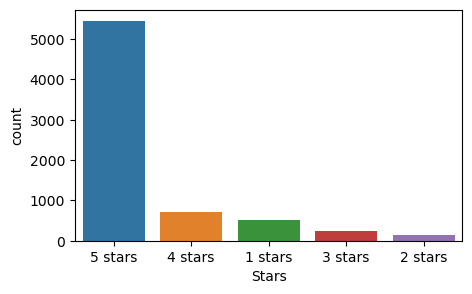

In [25]:
# Seeing Star rating distribution and Is_Positive? distribution 

plt.figure(figsize=(5, 3))
sns.countplot(data=eBay, x='Stars', order = eBay['Stars'].value_counts().index)
plt.show()

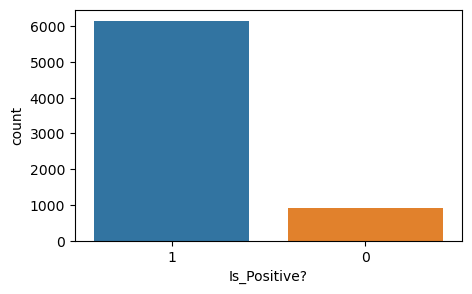

In [28]:
plt.figure(figsize=(5, 3))
sns.countplot(data=eBay, x='Is_Positive?', order = eBay['Is_Positive?'].value_counts().index)
plt.show()

Our data is imbalanced, so we will need to balance our training set prior to modeling.

### Building Models

#### Creating sets for model buidling

In [41]:
# Splitting Data into testing, validation, and training sets

X = eBay['Clean Title']
y = eBay['Is_Positive?']
train_X, rem_X, train_y, rem_y = train_test_split(X, y, train_size=0.7, random_state=42, stratify = y)
valid_X, test_X, valid_y, test_y = train_test_split(rem_X, rem_y, train_size=0.5, random_state=42, stratify = rem_y)

In [42]:
# Looking at the distribution, we will need to undersample the majority (1s)

train_y.value_counts()

1    4310
0     637
Name: Is_Positive?, dtype: int64

In [49]:
# randomly picking samples from positive reviews

eBay_test = pd.concat([train_X, train_y], axis = 1)

positive_indices = eBay_test[eBay_test['Is_Positive?'] == 1].index
random_indices = np.random.choice(positive_indices, 637, replace=False)
positive_sample = eBay_test.loc[random_indices]

In [55]:
# Joining the data to get our new training set

new_train = pd.concat([positive_sample, eBay_test[eBay_test['Is_Positive?'] == 0]], axis = 0)
new_train['Is_Positive?'].value_counts()

1    637
0    637
Name: Is_Positive?, dtype: int64

#### Altering data so it can work with LinearSVC model

In [79]:
# splitting into X and y

new_train_X = new_train['Clean Title']
new_train_y = new_train['Is_Positive?']

In [81]:
# formating data so it is no longer in list form

new_x = []

for i in new_train_X.index:
    new_x.append(' '.join(new_train_X[i]))

new_train_y.reset_index(drop=True,inplace=True)

In [89]:
x_df = []
x_df = pd.DataFrame(x_df)
x_df['Clean Title'] = pd.DataFrame(new_x)

In [100]:
# new x training set

new_train_X = x_df
new_train_X = new_train_X['Clean Title']
new_train_X

0                        ti83
1                   excellent
2           air pods pro 2021
3                 airpod pros
4           best console ever
                ...          
1269              big mistake
1270                 terrible
1271              flashlight￼
1272                impressed
1273    insane price increase
Name: Clean Title, Length: 1274, dtype: object

In [84]:
# making sure we still have all our data

new_train_y

0       1
1       1
2       1
3       1
4       1
       ..
1269    0
1270    0
1271    0
1272    0
1273    0
Name: Is_Positive?, Length: 1274, dtype: int64

In [106]:
# performing the same steps for our Validation Set

new_x = []
new_valid_y = valid_y

for i in valid_X.index:
    new_x.append(' '.join(valid_X[i]))

new_valid_y.reset_index(drop=True,inplace=True)

x_df = []
x_df = pd.DataFrame(x_df)
x_df['Clean Title'] = pd.DataFrame(new_x)
new_valid_X = x_df
new_valid_X = new_valid_X['Clean Title']
new_valid_X

0                    great allin1 printer
1                totally worth investment
2       useful calculator everything need
3                      awesome calculator
4                              suits best
                      ...                
1055                      well worth wait
1056           great features cool design
1057                          works great
1058                          works great
1059                           airpod pro
Name: Clean Title, Length: 1060, dtype: object

In [107]:
# making sure we have the same amount of data

new_valid_y

0       1
1       1
2       1
3       1
4       1
       ..
1055    1
1056    1
1057    1
1058    1
1059    0
Name: Is_Positive?, Length: 1060, dtype: int64

#### Bulding LinearSVC Model

In [112]:
# HyperTuning Parameters with Validation Set

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(new_train_X)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, new_train_y)


X_valid_tf = tfidf.transform(new_valid_X)
Y_pred = model1.predict(X_valid_tf)
print('Accuracy Score - ', accuracy_score(valid_y, Y_pred))
print(classification_report(valid_y, Y_pred))

Accuracy Score -  0.6943396226415094
              precision    recall  f1-score   support

           0       0.27      0.80      0.40       136
           1       0.96      0.68      0.79       924

    accuracy                           0.69      1060
   macro avg       0.61      0.74      0.60      1060
weighted avg       0.87      0.69      0.74      1060



In [114]:
# performing the same steps for our test set

new_x = []
new_test_y = test_y

for i in test_X.index:
    new_x.append(' '.join(test_X[i]))

new_test_y.reset_index(drop=True,inplace=True)

x_df = []
x_df = pd.DataFrame(x_df)
x_df['Clean Title'] = pd.DataFrame(new_x)
new_test_X = x_df
new_test_X = new_test_X['Clean Title']

In [115]:
# Using test set

X_test_tf = tfidf.transform(new_test_X)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(test_y, Y_pred))
print(classification_report(test_y, Y_pred))

Accuracy Score -  0.705937794533459
              precision    recall  f1-score   support

           0       0.28      0.82      0.42       137
           1       0.96      0.69      0.80       924

    accuracy                           0.71      1061
   macro avg       0.62      0.75      0.61      1061
weighted avg       0.87      0.71      0.75      1061



#### Topic Modeling: LSA

In this section, we will try to find 5 topics that are divided among the 5 different products that were in our data set: 
Calculator,  Apple AirPods, PS5, Flashlight, and Printor

In [116]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

In [121]:
# performing the same steps for all the X data

new_x = []

for i in X.index:
    new_x.append(' '.join(X[i]))

x_df = []
x_df = pd.DataFrame(x_df)
x_df['Clean Title'] = pd.DataFrame(new_x)
new_X = x_df
new_X = new_X['Clean Title']

In [131]:
tfidf_text_vectorizer = tfidf.fit_transform(new_X)
tfidf_text_vectorizer.shape

(7068, 276)

In [129]:
svd_para_model = TruncatedSVD(n_components = 5, random_state=42)
W_svd_para_matrix = svd_para_model.fit_transform(tfidf_text_vectorizer)
H_svd_para_matrix = svd_para_model.components_

display_topics(svd_para_model, tfidf.get_feature_names())


Topic 00
  great (35.68)
  product (7.72)
  great product (7.19)
  good (3.05)
  calculator (2.89)

Topic 01
  good (57.45)
  good product (6.15)
  product (5.71)
  calculator (2.13)
  good calculator (1.91)

Topic 02
  ps5 (82.64)
  awesome (4.24)
  love (2.89)
  review (1.98)
  love ps5 (1.98)

Topic 03
  awesome (57.12)
  calculator (7.67)
  product (4.01)
  ti83 (2.47)
  awesome product (2.32)

Topic 04
  calculator (39.01)
  ti83 (13.23)
  great calculator (9.12)
  plus (6.74)
  ti83 plus (6.25)


There are only really two topics seen here, the calculator (00, 01, 03, 04) and the PS5 (02).